In [ ]:
# Configure matplotlib for external interactive display
import matplotlib
import matplotlib.pyplot as plt

# Set backend for external interactive windows
matplotlib.use('Qt5Agg')  # Use Qt backend for interactive external windows
plt.ion()  # Turn on interactive mode

print(f"Matplotlib backend set to: {matplotlib.get_backend()}")
print("Charts will display in external interactive windows")

# Exercise 00: American Apple Pie

Create a pie chart to visualize user behavior on the website using data from Module 01's Data Warehouse.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import os
from pathlib import Path
from dotenv import load_dotenv

# Load environment variables from Module 01
env_path = Path("../.env")
load_dotenv(env_path)

def get_db_connection():
    """Establish connection to PostgreSQL database"""
    # Get credentials from environment variables
    db_host = os.getenv('POSTGRES_HOST', 'localhost')
    db_port = os.getenv('POSTGRES_PORT', '5432')
    db_name = os.getenv('POSTGRES_DB')
    db_user = os.getenv('POSTGRES_USER')
    db_password = os.getenv('POSTGRES_PASSWORD')
    
    # Validate required environment variables
    if not all([db_name, db_user, db_password]):
        raise ValueError("Missing required database credentials in environment variables")
    
    conn = psycopg2.connect(
        host=db_host,
        port=db_port,
        database=db_name,
        user=db_user,
        password=db_password
    )
    return conn

print("Libraries imported successfully")
print(f"Environment loaded from: {env_path}")
print(f"Database: {os.getenv('POSTGRES_DB')}")
print(f"User: {os.getenv('POSTGRES_USER')}")

Libraries imported successfully
Environment loaded from: ..\.env
Database: piscineds
User: nmunir


In [5]:
# Extract user behavior data
conn = get_db_connection()

query = """
SELECT 
    COALESCE(event_type, 'unknown') as action,
    COUNT(*) as count
FROM customers 
GROUP BY event_type
ORDER BY count DESC;
"""

data = pd.read_sql_query(query, conn)
conn.close()

print("User behavior data:")
print(data)
print(f"\nTotal events: {data['count'].sum():,}")

C:\Users\mrnom\AppData\Local\Temp\ipykernel_19724\2074918472.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


User behavior data:
             action    count
0              view  7704235
1              cart  4619639
2  remove_from_cart  3167270
3          purchase  1045014

Total events: 16,536,158


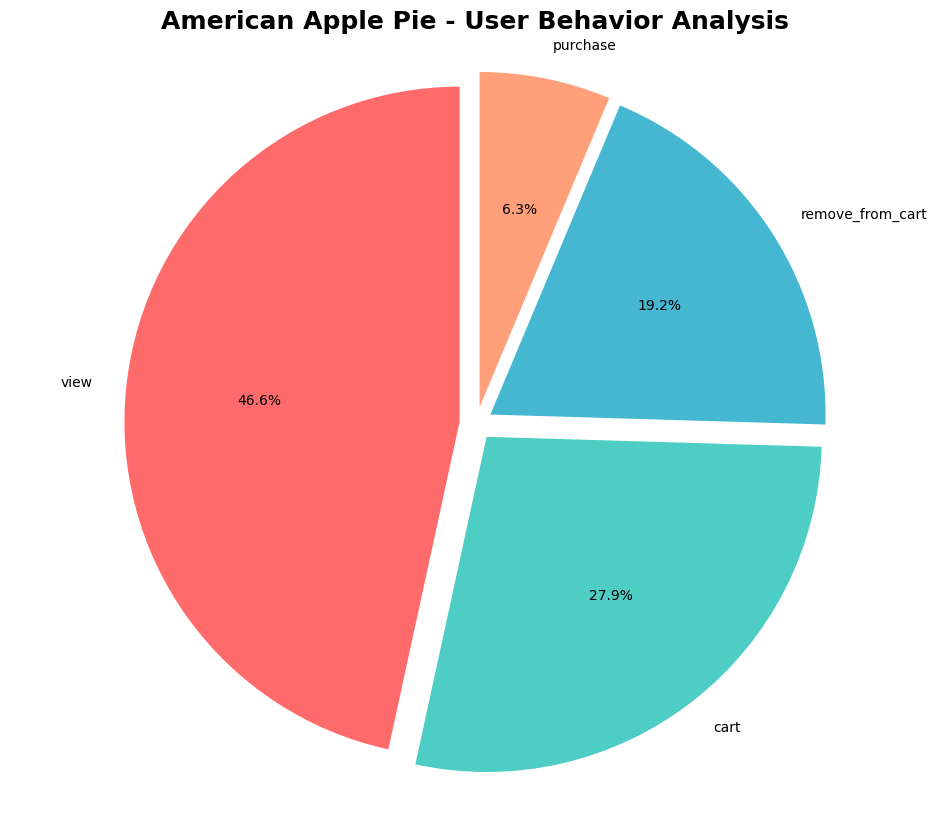

American Apple Pie chart displayed in external interactive window
You can resize, zoom, and interact with the chart in the external window


In [9]:
# Create the American Apple Pie chart in external interactive window
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors for each action type
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Create pie chart
wedges, texts, autotexts = ax.pie(data['count'], 
                                  labels=data['action'],
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=(0.05, 0.05, 0.05, 0.05))

ax.set_title('American Apple Pie - User Behavior Analysis', fontsize=18, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display in external interactive window
plt.show(block=False)  # Non-blocking show for interactive use

print("American Apple Pie chart displayed in external interactive window")
print("You can resize, zoom, and interact with the chart in the external window")